<a href="https://www.kaggle.com/code/ayamahmoudelgamal/arabic?scriptVersionId=186748446" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import cv2

2024-06-23 23:49:14.549406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 23:49:14.549464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 23:49:14.550866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_image=pd.read_csv('/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv')
train_label=pd.read_csv('/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv')

In [3]:
test_image=pd.read_csv('/kaggle/input/ahcd1/csvTestImages 3360x1024.csv')
test_label=pd.read_csv('/kaggle/input/ahcd1/csvTestLabel 3360x1.csv')

In [4]:
print(f"Train Iamges : {train_image.shape}")
print(f"Test  Iamges : {test_image.shape}")

Train Iamges : (13439, 1024)
Test  Iamges : (3359, 1024)


In [5]:
print(f"Train Labels : {train_label.shape}")
print(f"Test  Labels : {test_label.shape}")

Train Labels : (13439, 1)
Test  Labels : (3359, 1)


**Removing Missing Value**

In [6]:
train_image.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.901    0
0.902    0
0.903    0
0.904    0
0.905    0
Length: 1024, dtype: int64

In [7]:
train_label.isnull().sum()

1    0
dtype: int64

In [8]:
test_image.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.924    0
0.925    0
0.926    0
0.927    0
0.928    0
Length: 1024, dtype: int64

In [9]:
test_label.isnull().sum()

1    0
dtype: int64

In [10]:
arabic_chars = ['ا','ب','ت','ث','ج','ح','خ','د','ذ','ر','ز','س','ش','ص','ض','ط','ظ','ع','غ','ف','ق','ك','ل','م','ن','ھ','و','ي']
print(len(arabic_chars))

28


In [11]:
x_train = train_image.to_numpy()
y_train = train_label.to_numpy()-1 

x_test = test_image.to_numpy()
y_test = test_label.to_numpy()-1
print(f"X_Train Shape : {x_train.shape}")
print(f"X_Test  Shape : {x_test.shape}")
print(f"Y_Train Shape : {y_train.shape}")
print(f"Y_Test  Shape : {y_test.shape}")

X_Train Shape : (13439, 1024)
X_Test  Shape : (3359, 1024)
Y_Train Shape : (13439, 1)
Y_Test  Shape : (3359, 1)


In [12]:
x_train = x_train.reshape(-1,32,32,1)
x_test  = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test  = x_test / 255.0

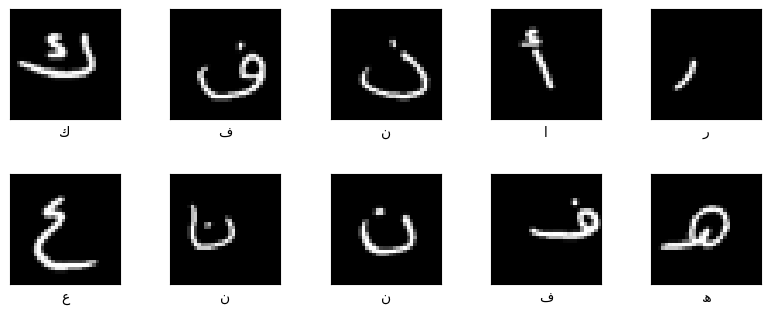

In [13]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32, 32).T, "gray")
    plt.xlabel(arabic_chars[int(y_train[ra[i]][0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [14]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(13439, 28) (3359, 28)


In [15]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(28, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,692 (1.38 MB)

 Trainable params: 361,500 (1.38 MB)

 Non-trainable params: 192 (768.00 B)

In [17]:
history = model.fit(
    x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
 33/420 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0783 - loss: 3.4057

I0000 00:00:1719186568.561081     548 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


420/420 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.3104 - loss: 2.3165 - val_accuracy: 0.3057 - val_loss: 2.1718
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7660 - loss: 0.6804 - val_accuracy: 0.8127 - val_loss: 0.5566
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8735 - loss: 0.4053 - val_accuracy: 0.7999 - val_loss: 0.6049
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9127 - loss: 0.2865 - val_accuracy: 0.9116 - val_loss: 0.3043
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9306 - loss: 0.2244 - val_accuracy: 0.8860 - val_loss: 0.4058
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9448 - loss: 0.1749 - val_accuracy: 0.9485 - val_loss: 0.1825
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9582 - loss: 0.1310 - val_accuracy: 0.9518 - val_loss: 0.1760
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9583 - loss: 0.1410 - val_accuracy: 0.8794 - va

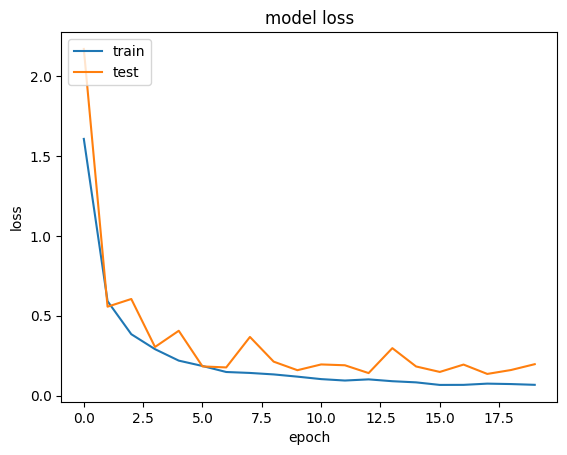

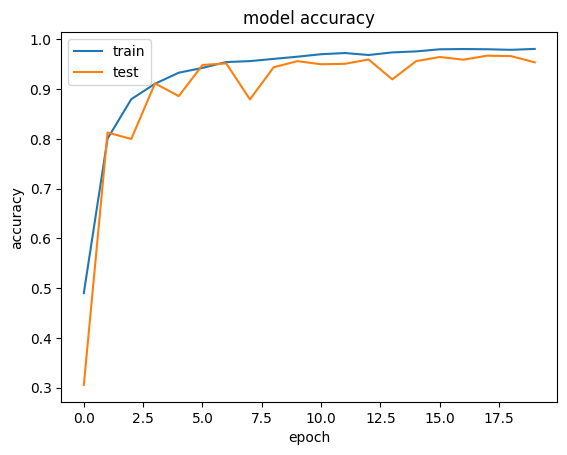

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
ModelLoss, ModelAccuracy = model.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.2146
Test Loss is 0.1964263767004013
Test Accuracy is 0.9538553357124329


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


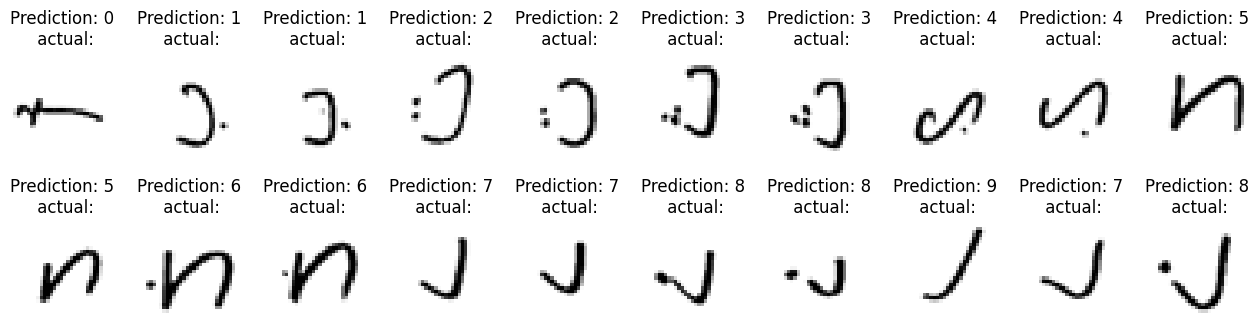

In [20]:
pred=model.predict(x_test)
pred = [np.argmax(i) for i in pred]
_,axes = plt.subplots(nrows=2,ncols=10 , figsize=(16,4))
for ax,image, actual, prediction in zip(axes.flatten(),x_test,y_test,pred):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title(f'Prediction: {prediction}\n actual:')

In [21]:
# Save the model to a writable directory
save_model = '/kaggle/working/Arabic_letter_model.h5'
model.save(save_model)
print(f"Model saved as {save_model}")

Model saved as /kaggle/working/Arabic_letter_model.h5


In [22]:
# Load the model from the saved path
loaded_model = tf.keras.models.load_model(save_model)
print("Model loaded successfully")

Model loaded successfully


In [23]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,694 (1.38 MB)

 Trainable params: 361,500 (1.38 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)